In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquakes-from-1900-2013/Earthquakes.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/earthquakes-from-1900-2013/Earthquakes.csv', index_col = 0)
df.head()

,Date,Time,latitude,longitude,depth,mag,magType,nst,net,id,updated,place,type
0,2014-03-17,05:11:34,-20.0030,-70.8741,17.0,6.2,mww,NaN,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake
1,2014-03-16,21:16:30,-19.9246,-70.6278,20.0,6.7,mww,NaN,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake
2,2014-03-15,23:51:30,-5.5660,-80.8790,9.8,6.3,mwp,NaN,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake
3,2014-03-15,08:59:21,-14.0935,-76.2968,20.0,6.1,mww,NaN,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake
4,2014-03-13,17:06:50,33.6793,131.8197,79.0,6.3,mwb,NaN,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake


In [4]:
df.isnull().sum()

Date           0
Time           0
latitude       0
longitude      0
depth          0
mag            1
magType       15
nst          202
net            0
id             0
updated        0
place          9
type           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8313 entries, 0 to 8312
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8313 non-null   object 
 1   Time       8313 non-null   object 
 2   latitude   8313 non-null   float64
 3   longitude  8313 non-null   float64
 4   depth      8313 non-null   float64
 5   mag        8312 non-null   float64
 6   magType    8298 non-null   object 
 7   nst        8111 non-null   float64
 8   net        8313 non-null   object 
 9   id         8313 non-null   object 
 10  updated    8313 non-null   object 
 11  place      8304 non-null   object 
 12  type       8313 non-null   object 
dtypes: float64(5), object(8)
memory usage: 909.2+ KB


In [6]:
df['Date'] = df['Date'].astype('datetime64[ns]')

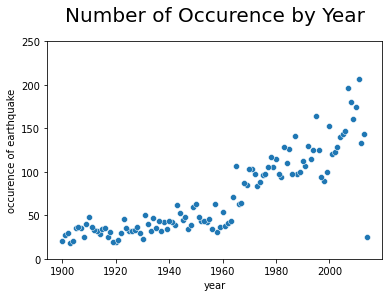

In [7]:
sns.scatterplot(data = df['Date'].dt.year.value_counts().sort_values())
plt.ylabel('occurence of earthquake')
plt.xlabel('year')
plt.title('Number of Occurence by Year', pad = 20, fontsize = 20)
plt.ylim(0, 250)
plt.show()

In [8]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,Time,latitude,longitude,depth,mag,magType,nst,net,id,updated,place,type,Year
0,2014-03-17,05:11:34,-20.0030,-70.8741,17.0,6.2,mww,NaN,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake,2014
1,2014-03-16,21:16:30,-19.9246,-70.6278,20.0,6.7,mww,NaN,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake,2014
2,2014-03-15,23:51:30,-5.5660,-80.8790,9.8,6.3,mwp,NaN,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake,2014
3,2014-03-15,08:59:21,-14.0935,-76.2968,20.0,6.1,mww,NaN,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake,2014
4,2014-03-13,17:06:50,33.6793,131.8197,79.0,6.3,mwb,NaN,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake,2014


In [9]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Time,latitude,longitude,depth,mag,magType,nst,net,id,updated,place,type,Year,Month
0,2014-03-17,05:11:34,-20.0030,-70.8741,17.0,6.2,mww,NaN,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake,2014,3
1,2014-03-16,21:16:30,-19.9246,-70.6278,20.0,6.7,mww,NaN,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake,2014,3
2,2014-03-15,23:51:30,-5.5660,-80.8790,9.8,6.3,mwp,NaN,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake,2014,3
3,2014-03-15,08:59:21,-14.0935,-76.2968,20.0,6.1,mww,NaN,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake,2014,3
4,2014-03-13,17:06:50,33.6793,131.8197,79.0,6.3,mwb,NaN,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake,2014,3


In [10]:
df['Day'] = df['Date'].dt.day
df.head()

,Date,Time,latitude,longitude,depth,mag,magType,nst,net,id,updated,place,type,Year,Month,Day
0,2014-03-17,05:11:34,-20.0030,-70.8741,17.0,6.2,mww,NaN,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake,2014,3,17
1,2014-03-16,21:16:30,-19.9246,-70.6278,20.0,6.7,mww,NaN,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake,2014,3,16
2,2014-03-15,23:51:30,-5.5660,-80.8790,9.8,6.3,mwp,NaN,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake,2014,3,15
3,2014-03-15,08:59:21,-14.0935,-76.2968,20.0,6.1,mww,NaN,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake,2014,3,15
4,2014-03-13,17:06:50,33.6793,131.8197,79.0,6.3,mwb,NaN,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake,2014,3,13


# EDA

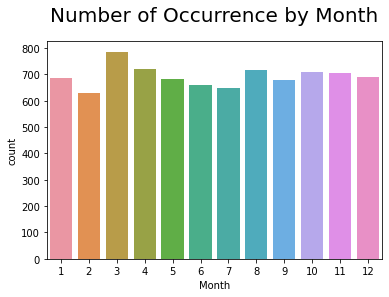

In [11]:
sns.countplot(x = 'Month', data = df)
plt.title('Number of Occurrence by Month', pad = 20, fontsize = 20)
plt.show()

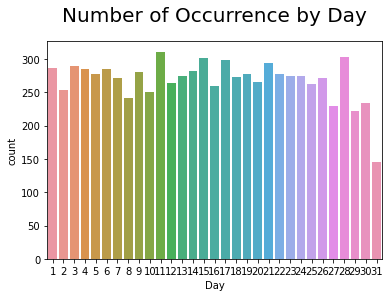

In [12]:
sns.countplot(x = 'Day', data = df)
plt.title('Number of Occurrence by Day', pad = 20, fontsize = 20)
plt.show()

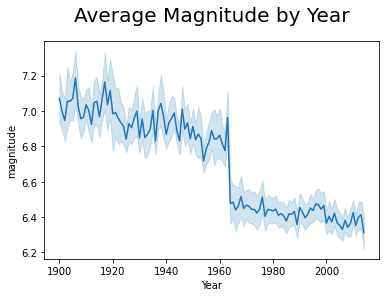

In [13]:
sns.lineplot(x = 'Year', y = 'mag', data = df)
plt.ylabel('magnitude')
plt.title('Average Magnitude by Year', pad = 20, fontsize = 20)
plt.show()

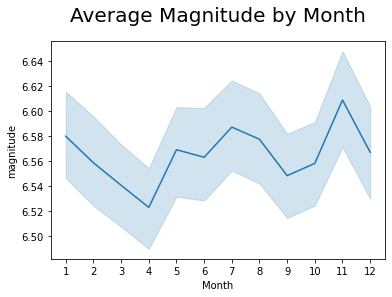

In [14]:
sns.lineplot(x = 'Month', y = 'mag', data = df)
plt.xticks([*range(1,13)])
plt.ylabel('magnitude')
plt.title('Average Magnitude by Month', pad = 20, fontsize = 20)
plt.show()

# Hypothesis Testing

## Two Sample Comparison

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores. It's called "t", and it can be calculated from three values from each sample using this equation.

While trying to determine which month is more likely to have strong earthquakes, you may wonder if the magnitude of the earthquakes that occurred in November of the shipments are stronger than one in other months.

### 1. Is the magnitude of earthquakes in November stronger than one in the other months?
- H0 (Null Hypothesis) : The magnitude of earthquakes in November is the same level as one in the other months.
- H1 (Alternative Hypothesis) : The magnitude of earthquakes in November is stronger than one in the other months.

In [15]:
mean_mag_nov, std_mag_nov, n_mag_nov = df.loc[(df['Month'] == 11), 'mag'].agg(['mean', 'std', 'count'])
mean_mag_nov, std_mag_nov, n_mag_nov

(6.609090909090909, 0.5173268337233348, 704.0)

In [16]:
mean_mag_others, std_mag_others, n_mag_others = df.loc[(df['Month'] != 11), 'mag'].agg(['mean', 'std', 'count'])
mean_mag_others, std_mag_others, n_mag_others

(6.560778128286014, 0.47943870186075727, 7608.0)

In [17]:
numerator = mean_mag_nov - mean_mag_others
denominator = np.sqrt(std_mag_nov**2/n_mag_nov + std_mag_others**2/n_mag_others)

# get test statistic
t_stat = numerator / denominator
t_stat

2.384936269490216

In [18]:
from scipy.stats import t

Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

In [19]:
degrees_of_freedom = n_mag_nov + n_mag_others - 2
significance_level = 0.05

# get p-value from t distribution
p_value = 1- t.cdf(t_stat, df = degrees_of_freedom)
print(p_value)
if p_value < significance_level:
    print('Reject null hypothesis. -> The magnitude of earthquakes in November are stronger than one in the other months.')
    
else:
    print('Fail to reject null hypothesis. -> The magnitude of earthquakes in November are the same level as one in the other months.')

0.00855218300485161
Reject null hypothesis. -> The magnitude of earthquakes in November are stronger than one in the other months.


In [20]:
!pip install -Uqq pingouin

**For the Convenience of T-test : Pingouin**

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the **pingouin Python package** has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

In [21]:
import pingouin

In [22]:
pingouin.ttest(x = df.loc[(df['Month'] == 11), 'mag'],
               y = df.loc[(df['Month'] != 11), 'mag'],
               alternative = 'greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.384936,818.706443,greater,0.008654,"[0.01, inf]",0.100076,1.496,0.814695


It is much easier to calculate p-value when comparing two sample means.

## 2. Is the magnitude of earthquakes in April weaker than one in the other months?
- H0 (Null Hypothesis) : The magnitude of earthquakes in April is the same level as one in the other months.
- H1 (Alternative Hypothesis) : The magnitude of earthquakes in April is weaker than one in the other months.

In [23]:
result = pingouin.ttest(x = df.loc[(df['Month'] == 4), 'mag'],
               y = df.loc[(df['Month'] != 4), 'mag'],
               alternative = 'less')
result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.525584,876.190153,less,0.005863,"[-inf, -0.02]",0.094912,2.087,0.785363


In [24]:
if result['p-val'].values < significance_level:
    print('Reject null hypothesis.')
else:
    print('Failed to reject null hypothesis.')

Reject null hypothesis.


### 2. Is the magnitude of earthquakes in November stronger than one in July?
- H0 (Null Hypothesis) : The magnitude of earthquakes in November is the same level as one in July.
- H1 (Alternative Hypothesis) : The magnitude of earthquakes in November is stronger than one in July.

In [25]:
result = pingouin.ttest(x = df.loc[(df['Month'] == 11), 'mag'],
               y = df.loc[(df['Month'] != 7), 'mag'],
               alternative = 'greater')
result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.276336,819.980876,greater,0.011541,"[0.01, inf]",0.094802,1.163,0.77702


In [26]:
if result['p-val'].values < significance_level:
    print('Reject null hypothesis.')
else:
    print('Failed to reject null hypothesis.')

Reject null hypothesis.


## Multiple Sample Comparison : ANOVA test, Pairwise t-test

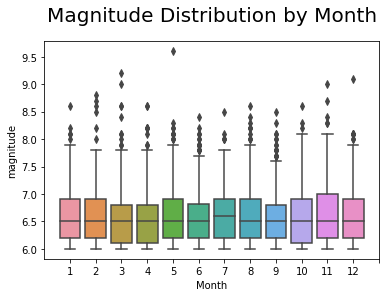

In [27]:
sns.boxplot(x = 'Month', y = 'mag', data = df)
plt.xticks([*range(0,13)])
plt.ylabel('magnitude')
plt.title('Magnitude Distribution by Month', pad = 20, fontsize = 20)
plt.xlim(-1, 12)
plt.show()

The box plots made it look like the distribution of magnitude was different for each of the month. However, it didn't tell us whether the mean magnitude was different in each month. To determine that, we can use an ANOVA test. 

- H0 (Null Hypothesis) : Magnitude of earchquakes for every month are the same.
- H0 (Alternative Hypothesis : Magnitude of earthquakes for some months of are different.

- Significance level: 0.2

### 1) ANOVA Test

In [28]:
pingouin.anova(data = df, dv = 'mag',between = 'Month')

,Source,ddof1,ddof2,F,p-unc,np2
0,Month,11,8300,1.543711,0.108687,0.002042


### 2) Pairwise t-test
The ANOVA test didn't tell you which groups of months had significant differences in magnitude. To pinpoint which months had differences, you could instead use pairwise t-tests.

In [29]:
# with no padjust
pairwise = pingouin.pairwise_tests(data = df, dv = 'mag', between = 'Month', padjust = 'none')
pairwise

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Month,1,2,False,True,0.811082,1306.297654,two-sided,0.417466,0.086,0.044724
1,Month,1,3,False,True,1.563198,1444.870718,two-sided,0.118225,0.196,0.081610
2,Month,1,4,False,True,2.262859,1394.903685,two-sided,0.023798,0.751,0.120733
3,Month,1,5,False,True,0.409033,1365.529775,two-sided,0.682580,0.066,0.022099
4,Month,1,6,False,True,0.641090,1341.268076,two-sided,0.521574,0.075,0.034940
...,...,...,...,...,...,...,...,...,...,...,...
61,Month,9,11,False,True,-2.284056,1375.937434,two-sided,0.022520,0.794,-0.122575
62,Month,9,12,False,True,-0.720355,1365.035288,two-sided,0.471429,0.078,-0.038901
63,Month,10,11,False,True,-1.935343,1395.546045,two-sided,0.053150,0.38,-0.102925
64,Month,10,12,False,True,-0.346735,1387.734371,two-sided,0.728843,0.064,-0.018541


In [30]:
pairwise[pairwise['p-unc'] < 0.2]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
1,Month,1,3,False,True,1.563198,1444.870718,two-sided,0.118225,0.196,0.081610
2,Month,1,4,False,True,2.262859,1394.903685,two-sided,0.023798,0.751,0.120733
12,Month,2,4,False,True,1.402027,1316.880964,two-sided,0.161143,0.162,0.076553
19,Month,2,11,False,True,-1.860942,1329.576145,two-sided,0.062973,0.341,-0.101529
24,Month,3,7,False,True,-1.843160,1392.926541,two-sided,0.065518,0.319,-0.097493
25,Month,3,8,False,True,-1.466853,1480.471844,two-sided,0.142628,0.168,-0.075831
28,Month,3,11,False,True,-2.629259,1441.548682,two-sided,0.008648,1.772,-0.136891
30,Month,4,5,False,True,-1.805134,1382.831004,two-sided,0.071271,0.3,-0.096501
31,Month,4,6,False,True,-1.572199,1356.031613,two-sided,0.116138,0.205,-0.084807
32,Month,4,7,False,True,-2.537703,1348.026695,two-sided,0.011270,1.458,-0.137331


We tests with 66 groups in this case. The problem of pairwise test with large number of groups is that it is likely to give us more significant results).

> test with 5 groups -> probability of at least 1 significant result = 0.7
<br>
> test with 20 groups -> probability of at least 1 significant result = 1.0

**Why is this a problem?**
The larger groups have advantage in getting more significant results, which may be the more false positive (not actually significant, but predicted as significant).

Therefore, we will apply an adjustment to increase p-value for large groups. 
One common correction is **'Bonferroni correction'.**

In [31]:
# "padjust = 'bonf'" is applying 'bonferroni correction'.
pairwise_bonf = pingouin.pairwise_tests(data = df, dv = 'mag', between = 'Month', padjust = 'bonf')
pairwise_bonf

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Month,1,2,False,True,0.811082,1306.297654,two-sided,0.417466,1.0,bonf,0.086,0.044724
1,Month,1,3,False,True,1.563198,1444.870718,two-sided,0.118225,1.0,bonf,0.196,0.081610
2,Month,1,4,False,True,2.262859,1394.903685,two-sided,0.023798,1.0,bonf,0.751,0.120733
3,Month,1,5,False,True,0.409033,1365.529775,two-sided,0.682580,1.0,bonf,0.066,0.022099
4,Month,1,6,False,True,0.641090,1341.268076,two-sided,0.521574,1.0,bonf,0.075,0.034940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Month,9,11,False,True,-2.284056,1375.937434,two-sided,0.022520,1.0,bonf,0.794,-0.122575
62,Month,9,12,False,True,-0.720355,1365.035288,two-sided,0.471429,1.0,bonf,0.078,-0.038901
63,Month,10,11,False,True,-1.935343,1395.546045,two-sided,0.053150,1.0,bonf,0.38,-0.102925
64,Month,10,12,False,True,-0.346735,1387.734371,two-sided,0.728843,1.0,bonf,0.064,-0.018541


The column, **p-corr** corresponds to corrected p-values with bonferroni correction.

In [32]:
# Look over the values in the p-corr column
# Find group with its p-corr is less than significance level
pairwise_bonf[pairwise_bonf['p-corr'] < 0.2]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
36,Month,4,11,False,True,-3.304462,1398.370149,two-sided,0.000976,0.064394,bonf,12.966,-0.175223


#### According to the result, only one of pairs apprears to have significant difference: April and November.
#### It agrees with the result of our previous two sample comparison. 